In [23]:
source("../../utils.R")
library(Seurat)
library(poem)

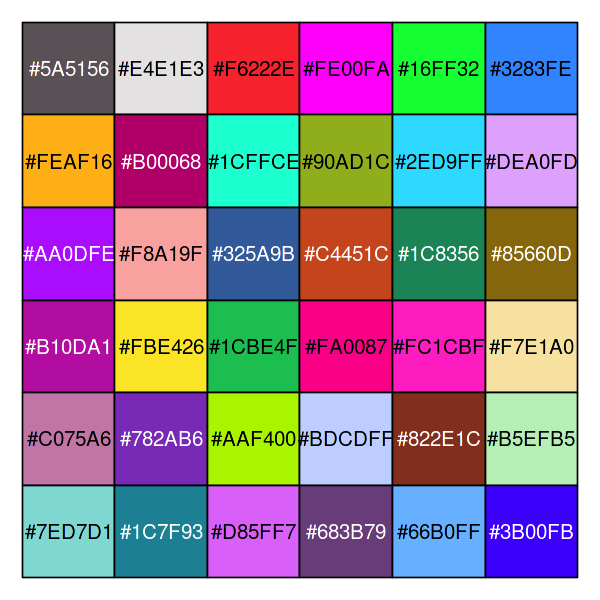

In [24]:
options(repr.plot.width=5, repr.plot.height=5)
par(mfrow=c(1,1))

show_col(my_col_polychrome)

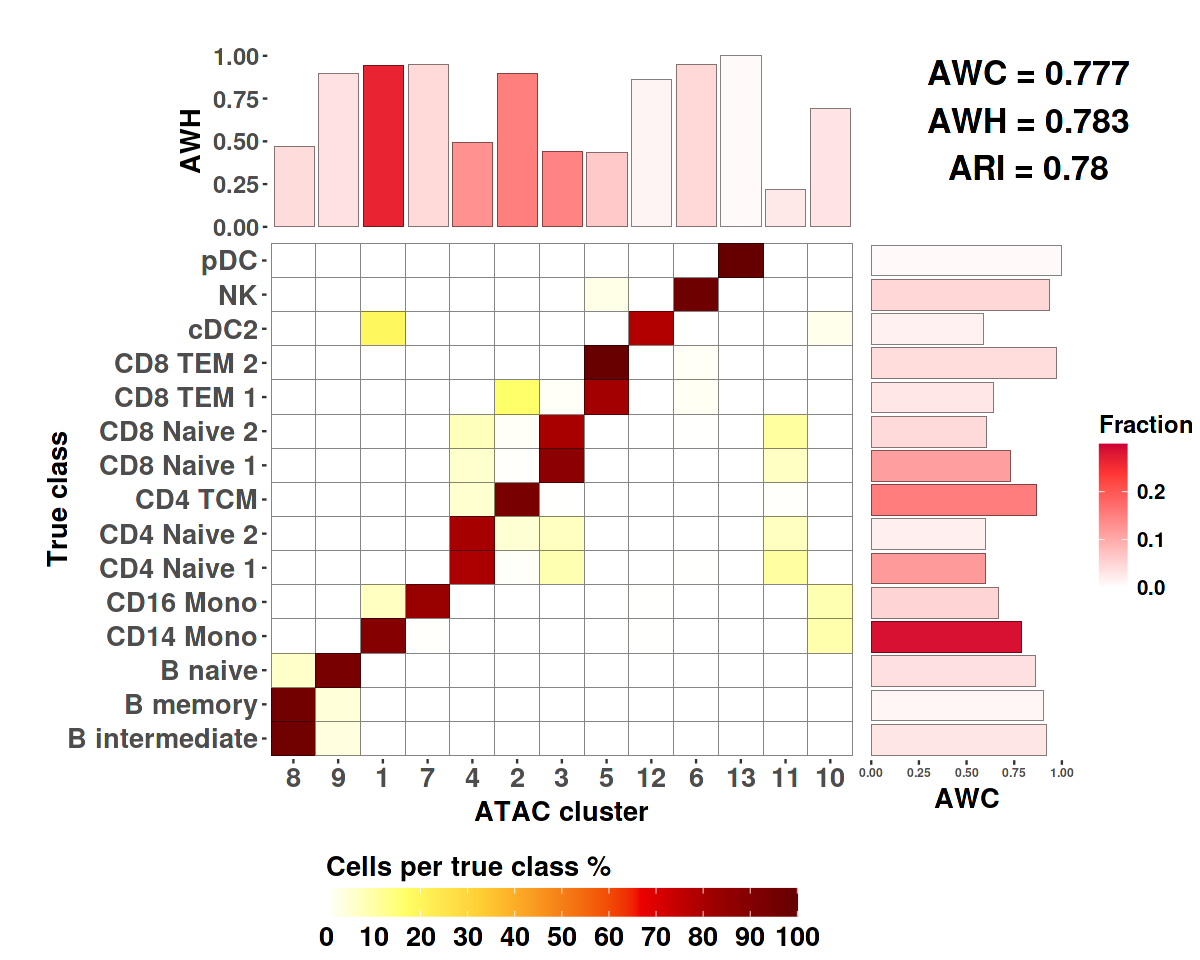

In [25]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

ground_truth_file <- '../../data/partition_real_life_examples/PBMC_ground_truth.tsv'
clustering_file <- '../../data/PWC/PBMC_aggregation_ndim15_seed0_r0.35.tsv'

df_label <- read.table(clustering_file, header = T, sep="\t", comment.char = "")
df_ground_truth <- read.table(ground_truth_file, header = T, sep="\t", comment.char = "")

df <- merge(df_label, df_ground_truth, by="barcode")
ground_truth <- as.factor(df$ground_truth)
clusterings <- as.factor(df$clusterings)

p2 <- cross_table_plot(ground_truth, clusterings, a=2, b=3.8, c=3.1, m=0, n=0.3)
p2

In [26]:
embed <- read.table("../../data/PWC/PBMC_aggregation_ndim15_embeding.tsv", header = T, sep="\t", comment.char = "")
embed <- embed[df$barcode,]

In [27]:
class(embed)

[1] "data.frame"

In [28]:
df_pwc <- data.frame(class=c(), PWC=c(), k=c())
for(k in c(5, 10, 15, 20, 25, 30)){
    res <- getGraphMetrics(embed, labels = ground_truth, metrics=c("PWC"), k=k, directed = TRUE, shared=TRUE, level="class")
    res$k <- k
    df_pwc <- rbind(df_pwc, res)
}

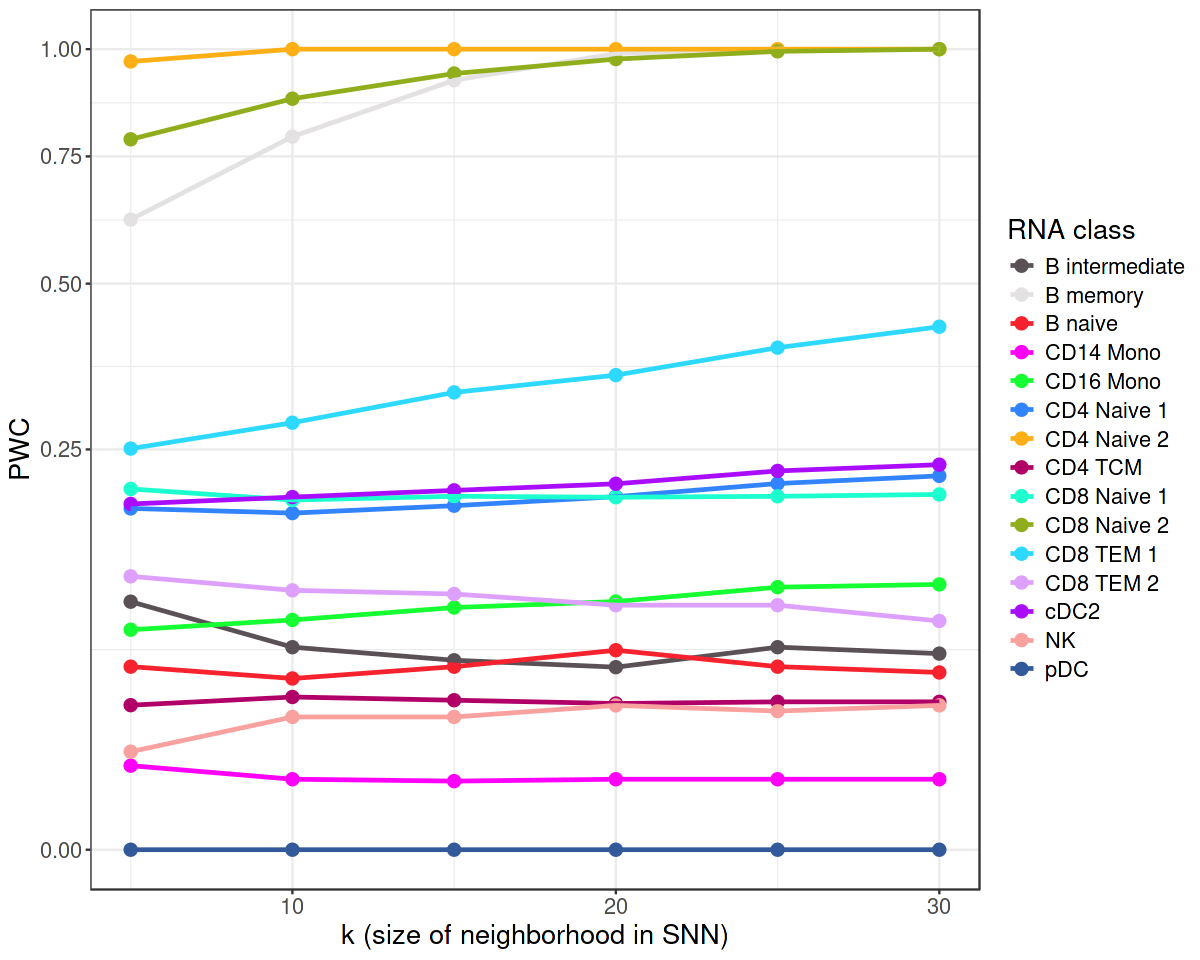

In [29]:
p1 <- df_pwc %>% ggplot(aes(x=k, y=PWC, color=class)) + 
geom_point(size=3) + 
geom_line(size=1) +
theme_bw() +
labs(x="k (size of neighborhood in SNN)", y="PWC", color="RNA class") +
scale_color_manual(values=my_col_polychrome) +
scale_y_sqrt() +
theme(text = element_text(size = 16))
p1

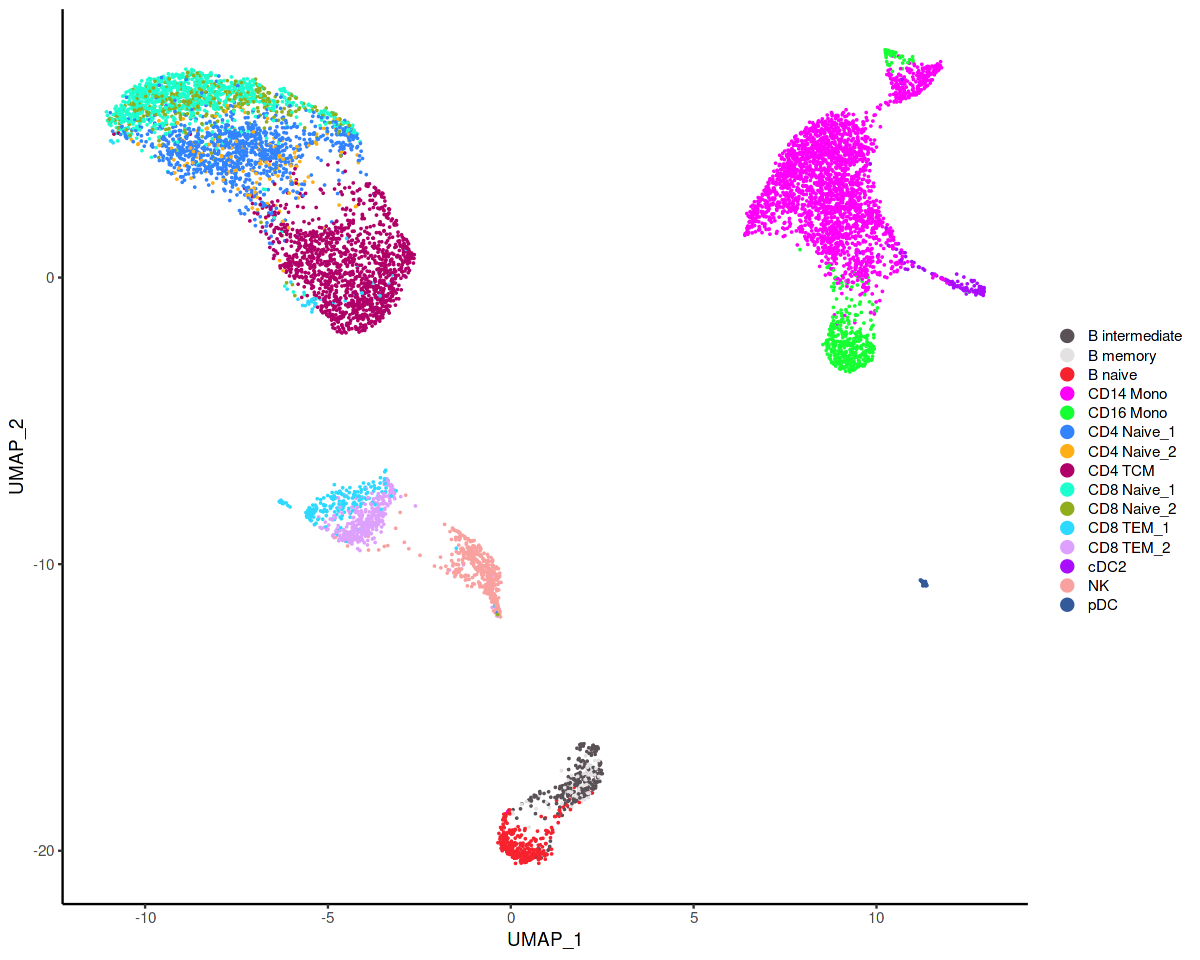

In [30]:
umap <- readRDS("../../data/PWC/umap_from_Signac_object.RDS")

p3 <- ggplot(umap, aes(x=UMAP_1, y=UMAP_2, color=ground_truth)) +
  geom_point(size=0.001) +
  theme_classic() +
  labs(color="") +
  scale_color_manual(values=my_col_polychrome) +
  guides(color = guide_legend(keywidth = 1, keyheight = 0.8, override.aes = list(size = 3)))

p3

In [31]:
svg("pwc_k.svg", width=7, height=5)
plot(p1)
dev.off() 

png 
  2

In [32]:
svg("agg_PBMC_cross_table.svg", width=9, height=8)
plot(p2)
dev.off() 

png 
  2

In [33]:
svg("agg_PBMC_UMAP.svg", width=7, height=5)
plot(p3)
dev.off() 

png 
  2